In [31]:
#Import the necessary libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [35]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

In [37]:
# Applying PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [39]:
# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

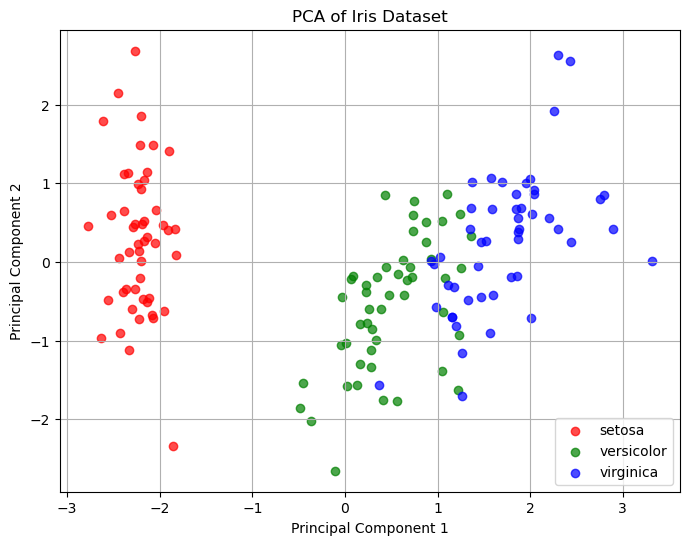

In [41]:
# Visualizing the results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

for i in range(3):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PC1'], 
                pca_df.loc[pca_df['target'] == i, 'PC2'], 
                label=labels[i], color=colors[i], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()